In [153]:
import math 
import array as arr
import numpy as np
from matplotlib import pyplot
%matplotlib inline

In [154]:
g=9.81
vt=4.9
CD=1.0/5.0
CL=1.0

theta0=-0.1
v0=6.5
x0=0.0
y0=2.0

T=15.0
dt=0.01
N=int(T/dt)+1

u_euler=np.empty((N, 4))
urk=np.empty((N, 4))
u_euler[0]=np.array([v0, theta0, x0, y0])
urk[0]=np.array([v0, theta0, x0, y0])

In [155]:
def rhs_phugoid(u, CL, CD, g, vt):
    [v, theta, x, y] = u
    rhs=np.array([-g*np.sin(theta)-CD/CL*g*v*v/vt**2, -g*np.cos(theta)/v+g*v/vt**2, v*np.cos(theta), v*np.sin(theta)])
    return rhs 

In [156]:
def euler_step(u, f, dt, *args):
    u_new=u+dt*f(u, *args)
    return u_new



In [157]:
def rk2(u, f, dt, *args):
    u_star=u+0.5*dt*f(u, *args)
    u_new=u+dt*f(u_star, *args)
    return u_new


In [158]:
for n in range (N-1):
    u_euler[n+1]=euler_step(u_euler[n], rhs_phugoid, dt, CL, CD, g, vt)
    urk[n+1]=rk2(urk[n], rhs_phugoid, dt, CL, CD, g, vt)

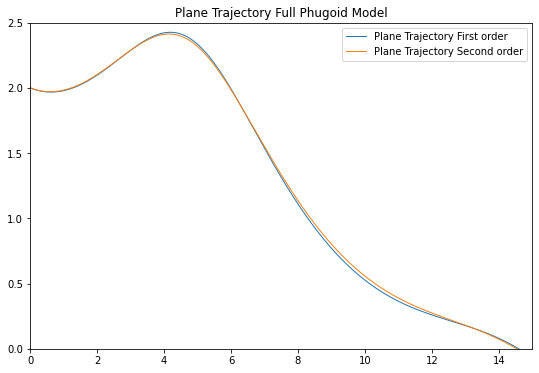

In [159]:
x_euler=u_euler[:, 2]
y_euler=u_euler[:, 3]
x_rk2=urk[:,2]
y_rk2=urk[:,3]

pyplot.figure(figsize=(9.0, 6.0))
pyplot.title('Plane Trajectory Full Phugoid Model')
pyplot.plot(x_euler, y_euler, label='Plane Trajectory First order')
pyplot.plot(x_rk2, y_rk2, label='Plane Trajectory Second order')
pyplot.rcParams['lines.linewidth']=1
pyplot.legend()
pyplot.xlim(0, 15)
pyplot.ylim(0, 2.5);

In [160]:
def l1_diff(u_coarse, u_fine, dt):
    N_coarse=len(u_coarse)
    N_fine=len(u_fine)
    ratio=math.ceil(N_fine/N_coarse)
    diff=dt*(np.sum(np.abs(u_coarse - u_fine[::ratio])))
    return diff

In [161]:
dt_values=[0.1, 0.05, 0.01, 0.005, 0.001]
u_values=[]

for dt in dt_values:
    N=int(T/dt)+1
    u=np.empty((N,4))
    u[0]=np.array([v0, theta0, x0, y0])
    for n in range(N-1):
        u[n+1]=rk2(u[n], rhs_phugoid, dt, CL, CD, g, vt)
    u_values.append(u)

In [162]:
diff_values=[]
for u, dt in zip(u_values, dt_values):
    diff = l1_diff(u[:,2], u_values[-1][:,2], dt)
    diff_values.append(diff)

In [163]:
idx_negative_euler = np.where(y_euler < 0.0)[0]
if len(idx_negative_euler) == 0:
    idx_ground_euler = N - 1
    print('[Euler] Glider has not touched ground yet!')
else:
    idx_ground_euler = idx_negative_euler[0]
# Get the index of the first negative element of y_rk2.
idx_negative_rk2 = np.where(y_rk2 < 0.0)[0]
if len(idx_negative_rk2) == 0:
    idx_ground_rk2 = N - 1
    print('[RK2] Glider has not touched ground yet!')
else:
    idx_ground_rk2 = idx_negative_rk2[0]

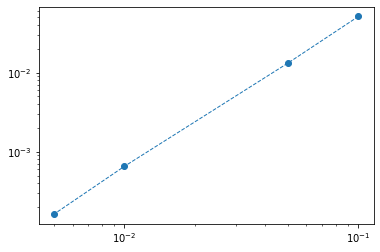

In [164]:
pyplot.loglog(dt_values[:-1], diff_values[:-1],
              color='C0', linestyle='--', marker='o')

In [165]:
r = 2  # time-step size refinement ratio
h = 0.001  # finest time-step size

dt_values = [h, r * h, r**2 * h]
u_values = []

for dt in dt_values:
    N = int(T / dt) + 1  # number of time steps
    # Set initial conditions.
    u = np.empty((N, 4))
    u[0] = np.array([v0, theta0, x0, y0])
    # Time integration using RK2.
    for n in range(N - 1):
        u[n + 1] = rk2(u[n], rhs_phugoid, dt, CL, CD, g, vt)
    # Store the solution for the present time grid.
    u_values.append(u)

# Compute the observed order of convergence.
p = (math.log(l1_diff(u_values[2], u_values[1], dt_values[2])/l1_diff(u_values[1], u_values[0], dt_values[1]))/math.log(r))

print('Observed order of convergence: p = {:.3f}'.format(p))

Observed order of convergence: p = 1.996


In [177]:
def leapfrog_step(u_prev, u, f, dt, *args):
    u_new=u_prev+2.0*dt*f(u, *args)
    return u_new


In [178]:
g=9.81
vt=4.9
CD=1.0/5.0
CL=1.0

theta0=-0.1
v0=6.5
x0=0.0
y0=2.0

T=15.0
dt=0.01
N=int(T/dt)+1

u_leapfrog=np.empty((N, 4))
u_leapfrog[0]=np.array([v0, theta0, x0, y0])
u_leapfrog[1]=rk2(u_leapfrog[0], rhs_phugoid, dt, CL, CD, g, vt)


In [179]:
for n in range(1, N-1):
    u_leapfrog[n+1]=leapfrog_step(u_leapfrog[n-1], u_leapfrog[n], rhs_phugoid, dt, CL, CD, g, vt)

In [180]:
x_leapfrog=u_leapfrog[:, 2]
y_leapfrog=u_leapfrog[:, 3]

idx_negative_leapfrog=np.where(y_leapfrog<0.0)[0]
if len(idx_negative_leapfrog)==0:
    idx_ground_leapfrog=N-1
    print('[leapfrog] Glider has not touched ground yet!')
else:
    idx_ground_leapfrog=idx_negative_leapfrog[0]
    

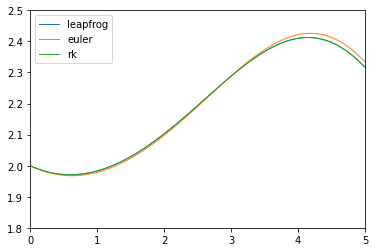

In [186]:
pyplot.plot(x_leapfrog[:idx_ground_leapfrog],y_leapfrog[:idx_ground_leapfrog], label='leapfrog')
pyplot.plot(x_euler,y_euler, label='euler')
pyplot.plot(x_rk2,y_rk2, label='rk')
pyplot.legend()
pyplot.xlim(0.0, 5.0)
pyplot.ylim(1.8, 2.5);

In [187]:
print('Distance traveled: {:.3f}'.format(x_leapfrog[idx_ground_leapfrog - 1]))

Distance traveled: 14.516


In [191]:
r = 2  # time-step size refinement ratio
h = 0.001  # finest time-step size

dt_values = [h, r * h, r**2 * h]
u_values = []

for dt in dt_values:
    N = int(T / dt) + 1  # number of time steps
    # Set initial conditions.
    u=np.empty((N, 4))
    u[0]=np.array([v0, theta0, x0, y0])
    u[1]=rk2(u_leapfrog[0], rhs_phugoid, dt, CL, CD, g, vt)
    # Time integration using RK2.
    for n in range(1, N - 1):
        u[n + 1] = leapfrog_step(u[n-1], u[n], rhs_phugoid, dt, CL, CD, g, vt)
    # Store the solution for the present time grid.
    u_values.append(u)

# Compute the observed order of convergence.
p = (math.log(l1_diff(u_values[2][:, 2], u_values[1][:, 2], dt_values[2])/l1_diff(u_values[1][:, 2], u_values[0][:, 2], dt_values[1]))/math.log(r))

print('Observed order of convergence: p = {:.3f}'.format(p))

Observed order of convergence: p = 2.187
